In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid', context='notebook', palette='deep')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [4]:
y_train = X_train['label']
X_train.drop(['label'], axis=1, inplace=True)

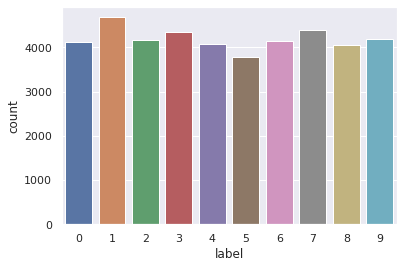

In [5]:
sns.countplot(y_train)
plt.show()

In [6]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())

0
0


In [7]:
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

In [8]:
y_train = to_categorical(y_train, 10)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.1, random_state=42
)

In [10]:
mean = X_train.mean().astype(np.floThe C3 marks are submitted in AVIRAL. You can check it.at32)
std = X_train.std().astype(np.float32)

def standardize(x): 
    return (x - mean) / std

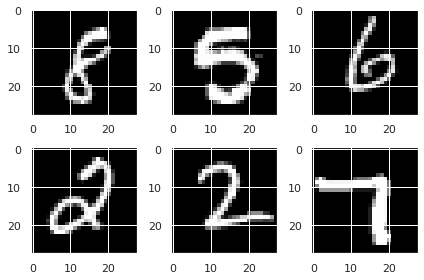

In [11]:
for i in range(0, 6):
    plt.subplot(231 + i)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')    
plt.tight_layout()

In [36]:
model = Sequential()

model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
          
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_32 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_34 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 32)       

In [39]:
opt = Adam(lr=1e-3, epsilon=1e-8, decay=0.0)
model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', patience=3, 
    verbose=1, factor=0.5, min_lr=1e-5
)
lr_scheduler = LearningRateScheduler(
    lambda x : 1e-3 * 0.95 ** x, verbose=0
)                  

In [46]:
EPOCHS = 30
BATCH_SIZE = 32

In [27]:
data_gen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.1, 
    width_shift_range=0.1, 
    height_shift_range=0.1
)  

data_gen.fit(X_train)

In [47]:
history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS, validation_data=(X_val, y_val),
    verbose=1, steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    callbacks=[lr_reduction]
)

Epoch 1/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0398 - accuracy: 0.9901 - val_loss: 0.0289 - val_accuracy: 0.9936
Epoch 2/30
1181/1181 [==============================] - 19s 16ms/step - loss: 0.0374 - accuracy: 0.9909 - val_loss: 0.0224 - val_accuracy: 0.9948
Epoch 3/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0347 - accuracy: 0.9918 - val_loss: 0.0247 - val_accuracy: 0.9938
Epoch 4/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0374 - accuracy: 0.9913 - val_loss: 0.0220 - val_accuracy: 0.9945
Epoch 5/30
1181/1181 [==============================] - 18s 16ms/step - loss: 0.0376 - accuracy: 0.9913 - val_loss: 0.0267 - val_accuracy: 0.9945

Epoch 00005: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 6/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0327 - accuracy: 0.9919 - val_loss: 0.0216 - val_accuracy: 0.9950
Epoch 7/30
1181/1181 [======================

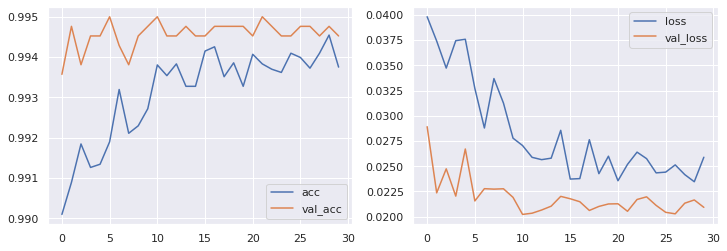

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc='best')
plt.show()

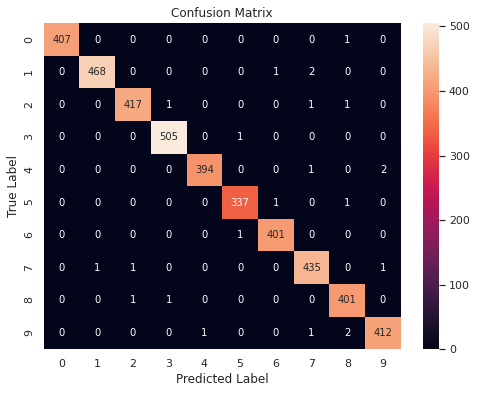

In [49]:
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1) 
y_val_true = np.argmax(y_val, axis=1) 

confusion_mtx = confusion_matrix(y_val_true, y_val_pred_classes) 
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [51]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name="Label")

In [52]:
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
submission.to_csv("Submission.csv", index=False)